In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [17]:
data = pd.read_csv(r"D:\BNCC\Lomba\Dataset Kedua.csv", encoding='latin-1')

print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
# Data Cleaning
irrelevant_cols = ['Customer Email', 'Customer Password', 'Product Image']
data.drop(columns=[col for col in irrelevant_cols if col in data.columns], inplace=True)
data.drop_duplicates(inplace=True)
data.fillna(method='ffill', inplace=True)

# Convert date columns
date_cols = ['order date (DateOrders)', 'shipping date (DateOrders)']
for col in date_cols:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col])

C:\Users\Akbar\AppData\Local\Temp\ipykernel_17804\40320331.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [87]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [86]:
print(data.isnull().sum())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Fname                        0
Customer Id                           0
Customer Lname                        0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      0
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0


In [88]:
print(data.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623722                       1.374449   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000 

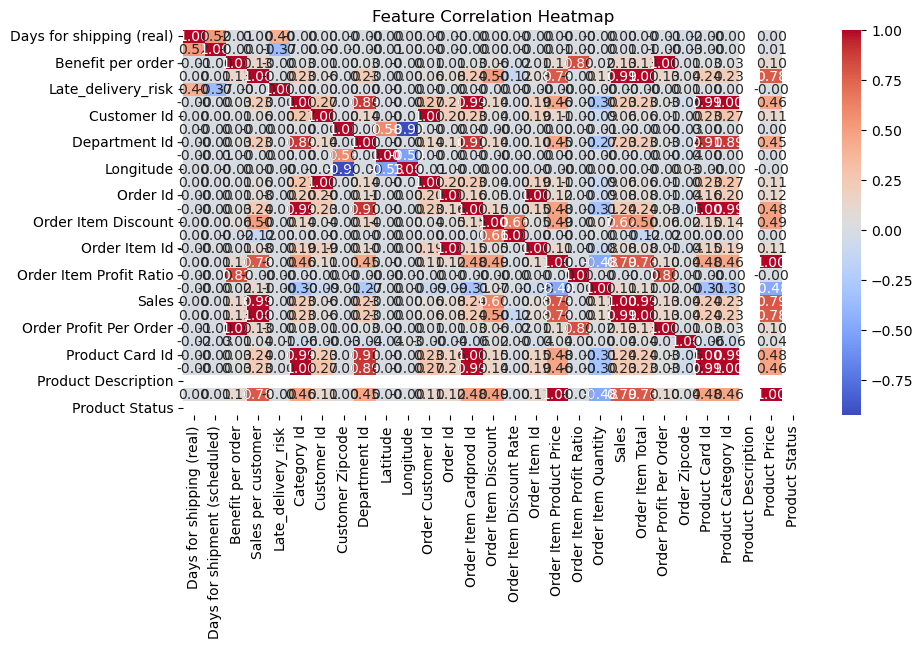

In [89]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
selected_columns = [
    'Days for shipping (real)', 
    'Days for shipment (scheduled)', 
    'Shipping Mode', 
    'Sales', 
    'Order Item Discount', 
    'Order Item Product Price', 
    'Late_delivery_risk'
]
df = data[selected_columns].dropna()

In [19]:
le = LabelEncoder()
df['Shipping Mode'] = le.fit_transform(df['Shipping Mode'])

In [20]:
X = df.drop(columns=['Late_delivery_risk'])
y = df['Late_delivery_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

In [24]:
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model: 0.97
ROC AUC Score: 0.97
Confusion Matrix:
[[15386   922]
 [    0 19796]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16308
           1       0.96      1.00      0.98     19796

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



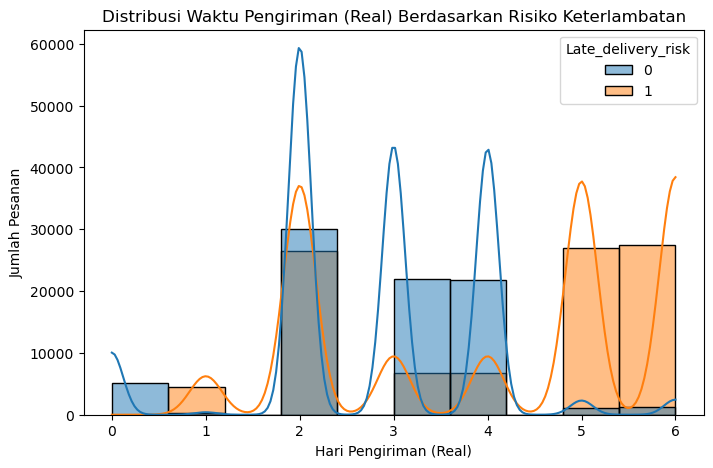

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Days for shipping (real)", hue="Late_delivery_risk", kde=True, bins=10)
plt.title("Distribusi Waktu Pengiriman (Real) Berdasarkan Risiko Keterlambatan")
plt.xlabel("Hari Pengiriman (Real)")
plt.ylabel("Jumlah Pesanan")
plt.show()

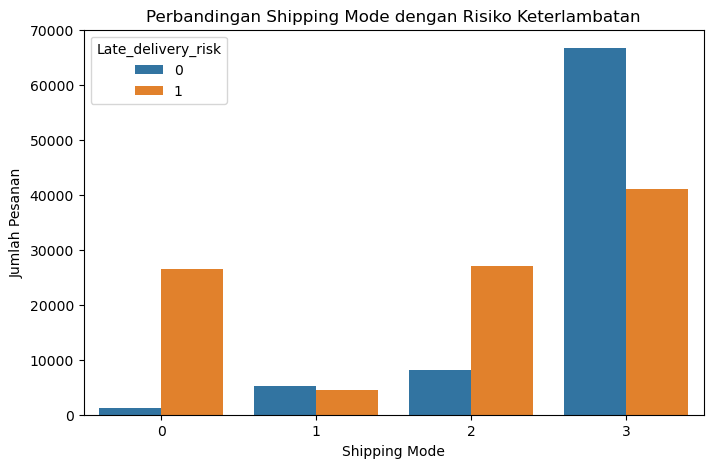

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Shipping Mode", hue="Late_delivery_risk")
plt.title("Perbandingan Shipping Mode dengan Risiko Keterlambatan")
plt.xlabel("Shipping Mode")
plt.ylabel("Jumlah Pesanan")
plt.show()

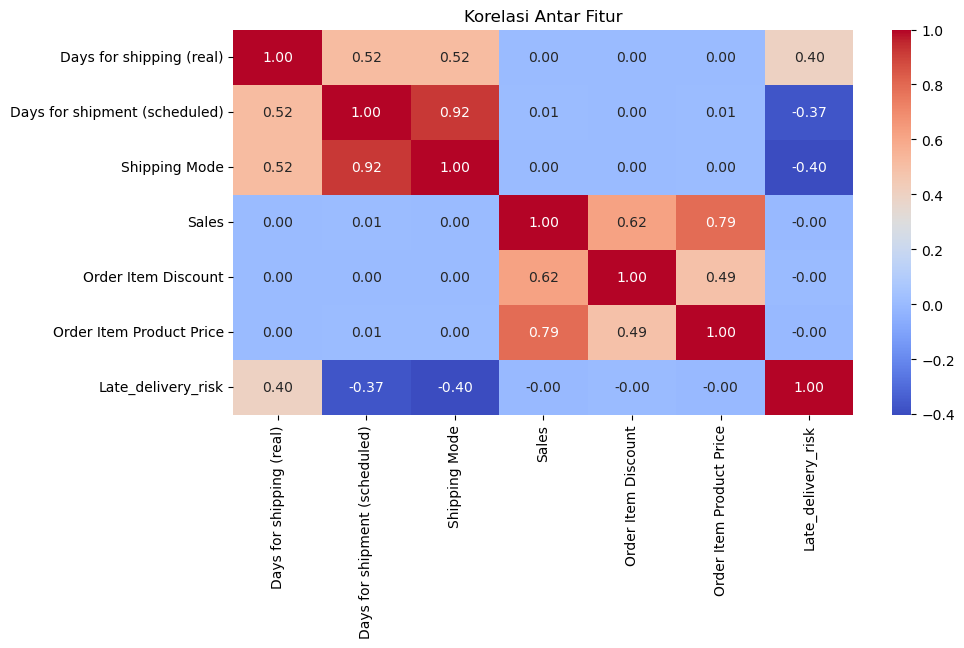

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()